In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns

plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [2]:
data = pd.read_csv("syntactic_complexity_per_sentence.tsv", sep="\t", header=0, index_col=0)

/home/ccl/spthproi/virtualenvs/py3k/lib/python3.5/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data_for_boxplots = data.copy()
data_for_boxplots["brow_genre"] = data_for_boxplots["brow"]
low_brow = data[data.brow == "low"].copy()
low_brow["brow_genre"] = low_brow["genre"]
data_for_boxplots = pd.concat((data_for_boxplots, low_brow))

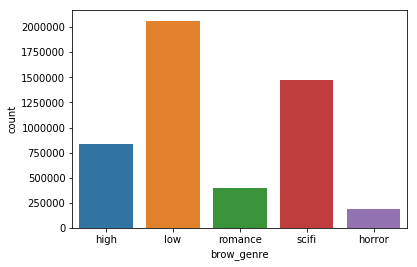

In [4]:
sns.countplot(x="brow_genre", data=data_for_boxplots)
plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [5]:
data.describe()

,sentence_id,average_dependency_distance,closeness_centrality,outdegree_centralization,closeness_centralization,sentence_length,dependents_per_word,longest_shortest_path,punctuation
count,2.894423e+06,2.894423e+06,2.894423e+06,2.894423e+06,2.894423e+06,2.894423e+06,2.894423e+06,2.894423e+06,2.894423e+06
mean,2.122140e+03,2.027002e+00,4.847839e-01,3.190019e-01,4.143873e-01,1.356567e+01,8.891277e-01,4.212966e+00,2.284488e+00
std,2.389474e+03,7.367023e-01,1.795777e-01,1.905722e-01,1.756995e-01,9.443208e+00,8.073896e-02,2.147759e+00,1.588274e+00
min,0.000000e+00,0.000000e+00,3.884235e-02,1.562500e-02,3.374072e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.620000e+02,1.444444e+00,3.513514e-01,1.875000e-01,2.905397e-01,7.000000e+00,8.571429e-01,3.000000e+00,1.000000e+00
50%,1.525000e+03,1.916667e+00,4.583333e-01,2.695312e-01,3.804439e-01,1.100000e+01,9.090909e-01,4.000000e+00,2.000000e+00
75%,2.365000e+03,2.500000e+00,6.000000e-01,3.827160e-01,5.050000e-01,1.700000e+01,9.411765e-01,5.000000e+00,3.000000e+00
max,2.060600e+04,1.542857e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.560000e+02,9.960938e-01,5.100000e+01,4.900000e+01


In [6]:
genres = "high romance scifi horror".split()

In [7]:
default_palette = sns.color_palette()
new_palette = [default_palette[0]] + default_palette[2:]
sns.set_palette(new_palette)

# Distributions of syntactic complexity measures on the sentence level

## Average dependency distance

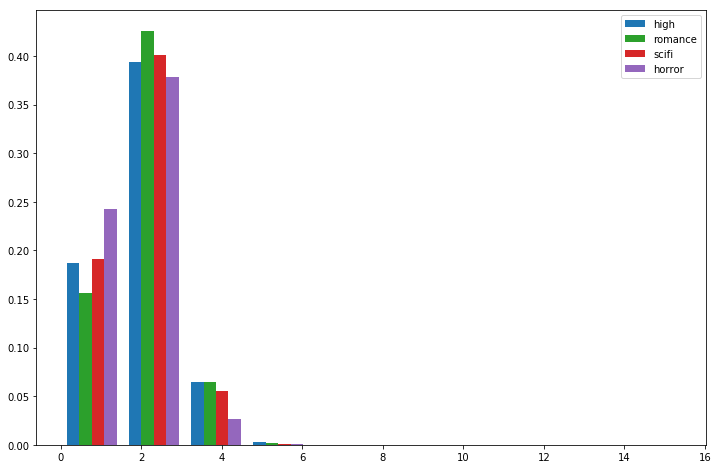

In [8]:
d = [data[data["genre"] == g]["average_dependency_distance"] for g in genres]
plt.hist(d, log=False, density=True, label=genres)
plt.legend()

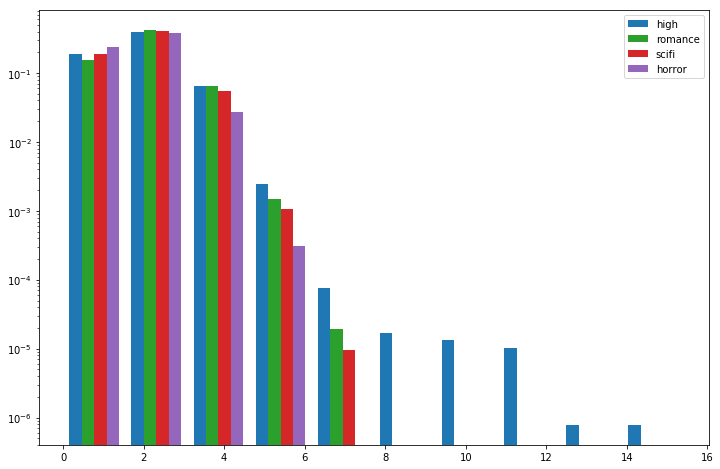

In [9]:
plt.hist(d, log=True, density=True, label=genres)
plt.legend()

## Closeness centrality

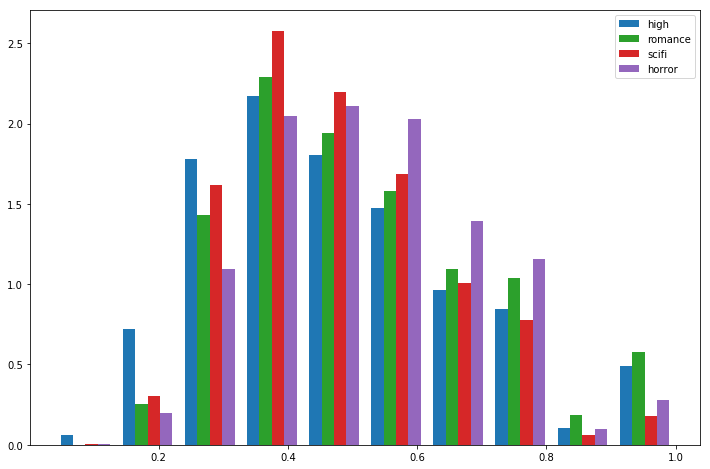

In [10]:
d = [data[data["genre"] == g]["closeness_centrality"] for g in genres]
plt.hist(d, log=False, density=True, label=genres)
plt.legend()

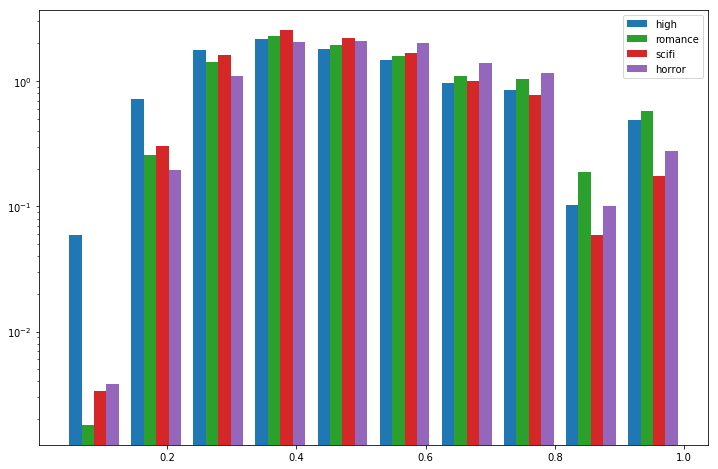

In [11]:
plt.hist(d, log=True, density=True, label=genres)
plt.legend()

## Outdegree centralization

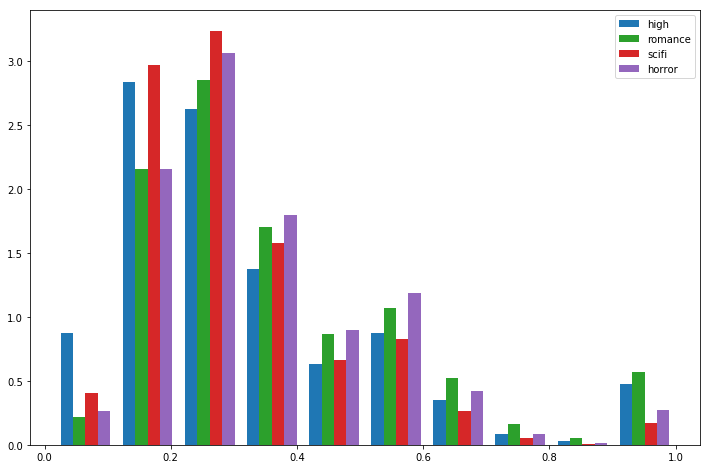

In [12]:
d = [data[data["genre"] == g]["outdegree_centralization"] for g in genres]
plt.hist(d, log=False, density=True, label=genres)
plt.legend()

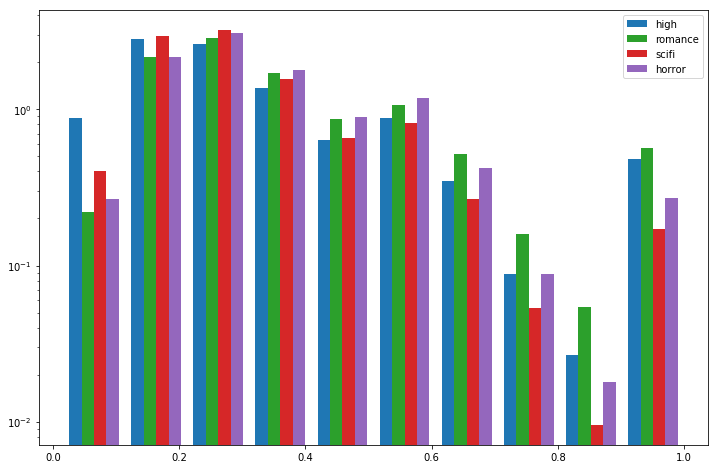

In [13]:
plt.hist(d, log=True, density=True, label=genres)
plt.legend()

## Closeness centralization

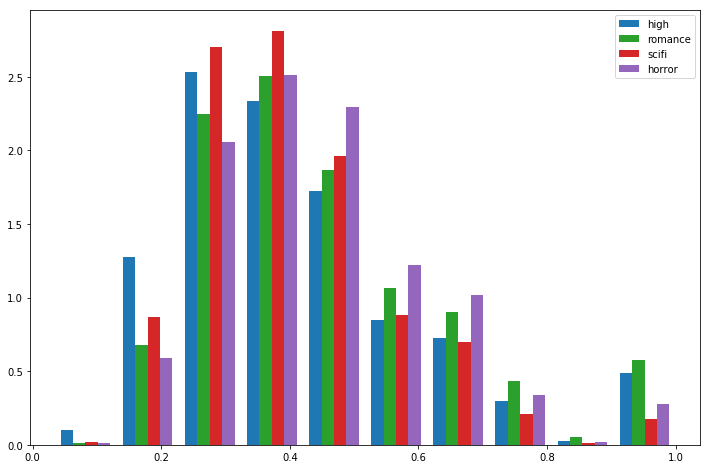

In [14]:
d = [data[data["genre"] == g]["closeness_centralization"] for g in genres]
plt.hist(d, log=False, density=True, label=genres)
plt.legend()

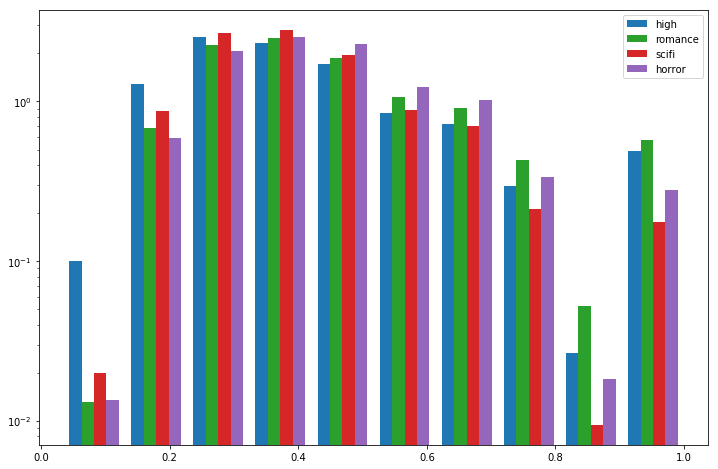

In [15]:
plt.hist(d, log=True, density=True, label=genres)
plt.legend()

## Sentence length

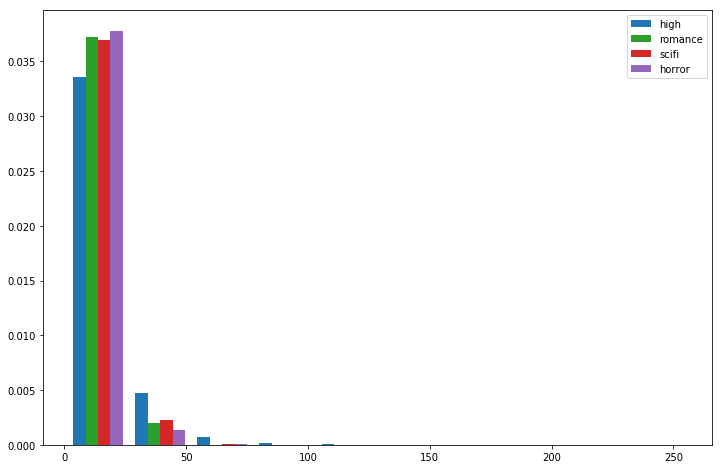

In [16]:
d = [data[data["genre"] == g]["sentence_length"] for g in genres]
plt.hist(d, log=False, density=True, label=genres)
plt.legend()

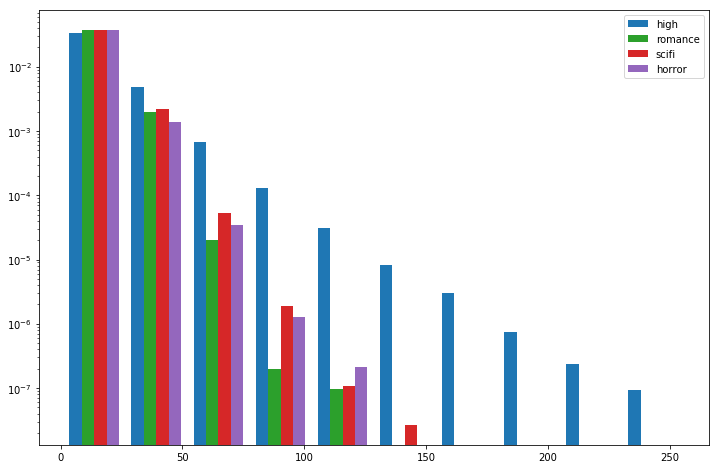

In [17]:
plt.hist(d, log=True, density=True, label=genres)
plt.legend()

## Dependents per word

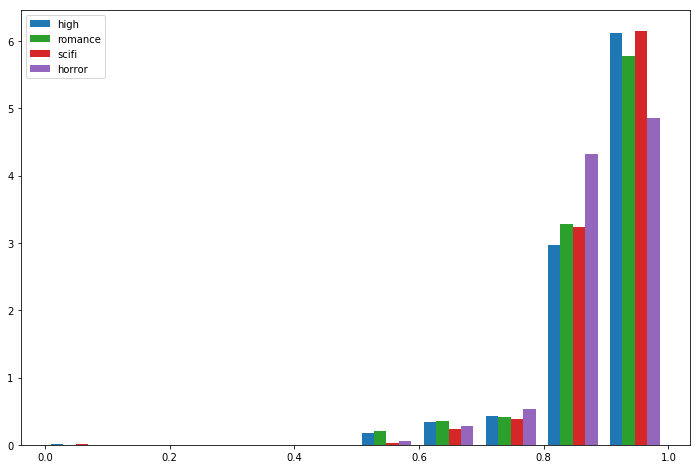

In [18]:
d = [data[data["genre"] == g]["dependents_per_word"] for g in genres]
plt.hist(d, log=False, density=True, label=genres)
plt.legend()

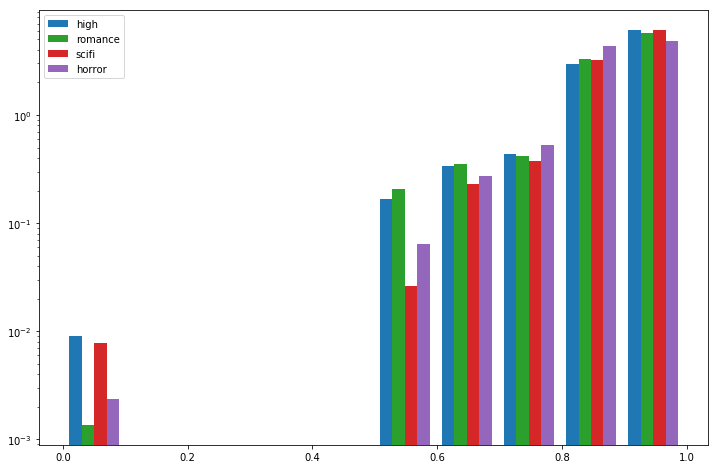

In [19]:
plt.hist(d, log=True, density=True, label=genres)
plt.legend()

## Longest shortest path

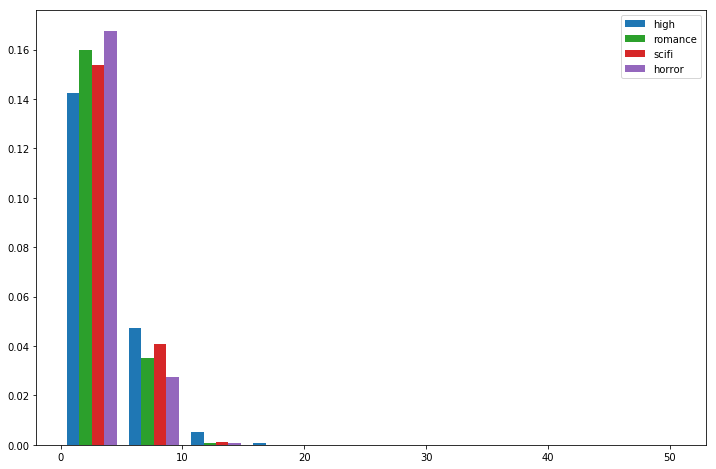

In [20]:
d = [data[data["genre"] == g]["longest_shortest_path"] for g in genres]
plt.hist(d, log=False, density=True, label=genres)
plt.legend()

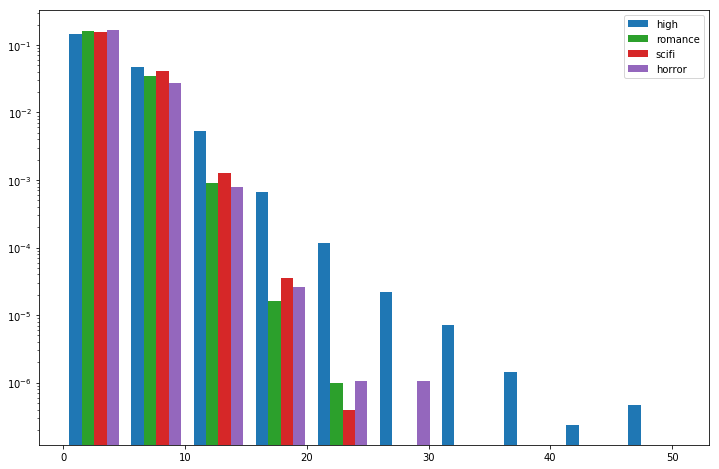

In [21]:
plt.hist(d, log=True, density=True, label=genres)
plt.legend()

## Punctuation

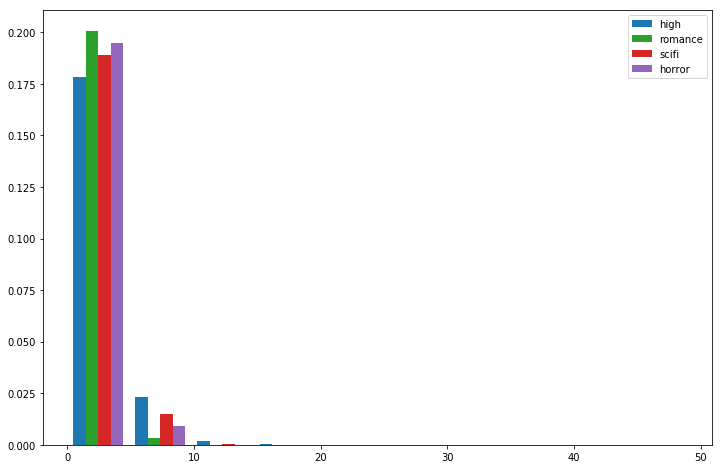

In [22]:
d = [data[data["genre"] == g]["punctuation"] for g in genres]
plt.hist(d, log=False, density=True, label=genres)
plt.legend()

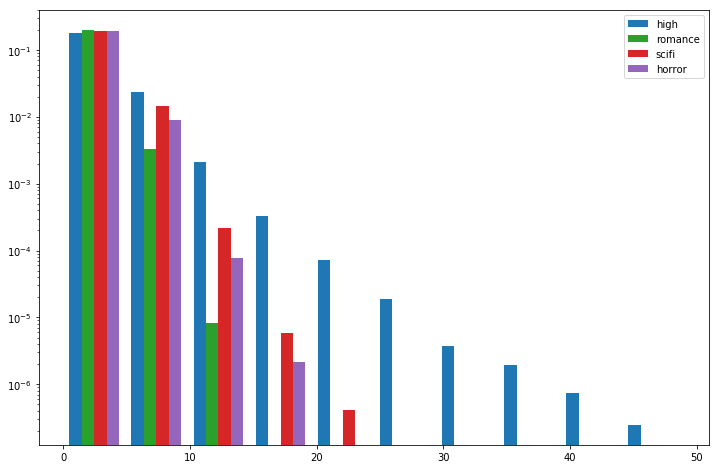

In [23]:
plt.hist(d, log=True, density=True, label=genres)
plt.legend()

# Other distributions

## Distribution of individual dependency distances

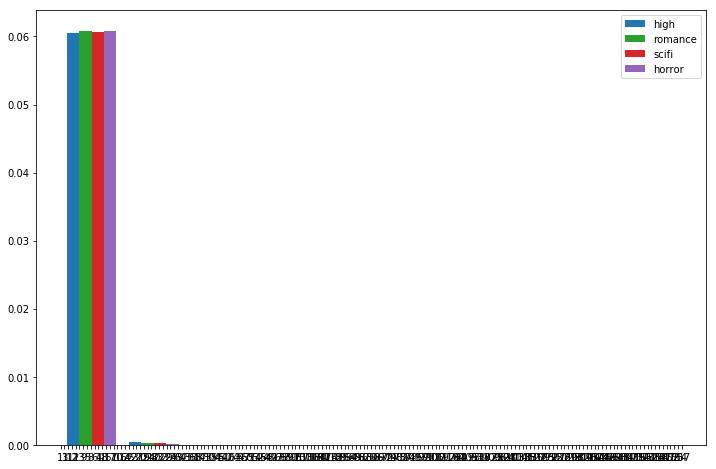

In [24]:
d = [data[data["genre"] == g]["dependency_distances"] for g in genres]
d = [[e for sent in genre for e in sent.split(",")] for genre in d]
plt.hist(d, log=False, density=True, label=genres)
plt.legend()

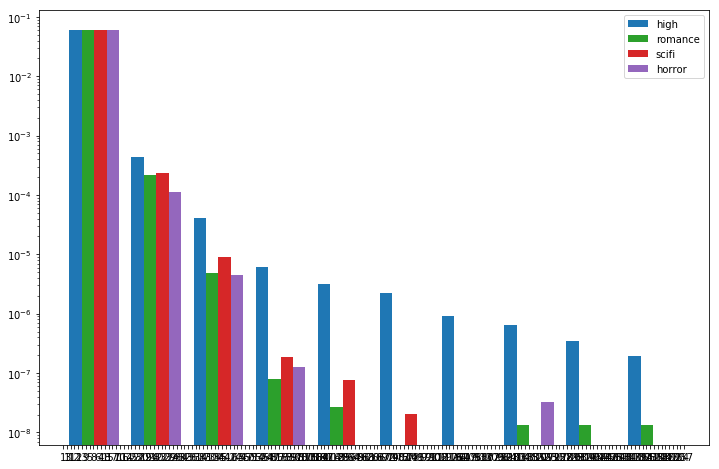

In [25]:
plt.hist(d, log=True, density=True, label=genres)
plt.legend()